# Project Name - Exploratory data analysis on Google Play Store

### Import Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Loading the dataset

In [2]:
#importing google play store csv file
df=pd.read_csv('googleplaystore.csv')

###  Dataset sample view

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Information about the dataset

In [4]:
# checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Missing values in the dataset

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Changing the datatypes of the columns

### a) Removing the invalid value from the reviews and converting the datatype of reviews to int

In [6]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# removing invalid Review
df=df.drop([10472])

In [8]:
#changing the datatype of Reviews to int
df["Reviews"]=df["Reviews"].astype("int")

### b) Sizes of applications are converted from string to float format and transformed all the values to thousands

In [9]:
#converting all the values to thousands i.e in k
df["Size"]=df["Size"].str.replace('M','000')
df["Size"]=df["Size"].str.replace('k',' ')

In [10]:
df['Size']

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10840, dtype: object

In [11]:
# checking the values of size which is not an integer
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [12]:
#changing the datatype of Size to float
df['Size'] = df['Size'].apply(lambda x: float(x) if x != 'Varies with device' else x)

In [13]:
df['Size']

0                   19000.0
1                   14000.0
2                       8.7
3                   25000.0
4                       2.8
                ...        
10836               53000.0
10837                   3.6
10838                   9.5
10839    Varies with device
10840               19000.0
Name: Size, Length: 10840, dtype: object

In [14]:
df['Size'].isnull().sum()

0

### c) Removing the unneccesary symbols from Installs and Price columns and changing their datatypes to int and float respectively

In [15]:
# removing the unnecessary symbols from Installs and Price columns
char_to_remove=["+",",","$"]
col_to_clean=["Installs","Price"]
for items in char_to_remove:
    for col in col_to_clean:
        df[col]=df[col].str.replace(items,"",regex=True)

In [16]:
#changing the datatype of Installs to int
df["Installs"]=df["Installs"].astype("int")

In [17]:
#changing the datatype of Price to int
df["Price"]=df["Price"].astype("float")

### d) Changing the datatype of Last Updated column to datetime

In [18]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [19]:
# updated datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.1+ MB


### Handling Null values

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### a) Rating- replacing the 1474 null values with median of rating

In [21]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7,50000,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,100000,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,10000,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up


In [22]:
df['Rating'].fillna(value=df['Rating'].median(),inplace=True) 
df['Reviews'].isnull().sum()

0

In [23]:
# number of rating cannot be greater than the number of installations hence droppping these columns
invalid_rows=df.loc[df['Rating'] > df['Installs']]

In [24]:
df = df.drop(invalid_rows.index)

In [25]:
df.loc[df['Rating'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [27]:
#dropping nan from Current Ver 
df[df['Current Ver'].isnull()==True]
df=df.dropna(subset='Current Ver')

In [28]:
#dropping nan from Android Ver 
df=df.dropna(subset='Android Ver')

In [29]:
#dropping nan from Android Ver 
df=df.dropna(subset='Type')

In [30]:
df['Size']

0                   19000.0
1                   14000.0
2                       8.7
3                   25000.0
4                       2.8
                ...        
10836               53000.0
10837                   3.6
10838                   9.5
10839    Varies with device
10840               19000.0
Name: Size, Length: 10748, dtype: object

In [31]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [32]:
# dropping the duplicate values from app
df.drop_duplicates(subset='App',inplace=True)

In [33]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook        1
ck-modelcars Shop                                     1
ck-modelcars-UK Shop                                  1
CK Multimedia - Gaming Accessories                    1
CK SKILLZ                                             1
                                                     ..
Learn C# - .Net - C Sharp Programming Tutorial App    1
Learn Basic C - For Beginners                         1
C Prowess                                             1
101 C Programming Problems                            1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9567, dtype: int64

In [34]:
# calculating the top 8 categories
top_counts = df['Category'].value_counts()
top_counts

FAMILY                 1816
GAME                    954
TOOLS                   820
BUSINESS                414
MEDICAL                 387
PRODUCTIVITY            369
PERSONALIZATION         366
LIFESTYLE               364
FINANCE                 339
SPORTS                  322
COMMUNICATION           314
HEALTH_AND_FITNESS      286
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      253
SOCIAL                  235
BOOKS_AND_REFERENCE     220
TRAVEL_AND_LOCAL        217
SHOPPING                202
DATING                  169
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          111
ENTERTAINMENT           102
AUTO_AND_VEHICLES        84
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   63
ART_AND_DESIGN           62
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [82]:
df.groupby(['Category', 'App'])['Installs'].sum().loc['ART_AND_DESIGN'].sort_values(ascending=False)

App
Sketch - Draw & Paint                                 50000000
Canva: Poster, banner, card maker & graphic design    10000000
Textgram - write on photos                            10000000
ibis Paint X                                          10000000
Tattoo Name On My Photo Editor                        10000000
                                                        ...   
AJ Styles HD Wallpapers                                   5000
X Launcher Prime: With OS Style Theme & No Ads            1000
AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper         1000
صور حرف H                                                 1000
Spring flowers theme couleurs d t space                    100
Name: Installs, Length: 62, dtype: int32

## Data Visualisation

## Categories in the google play store

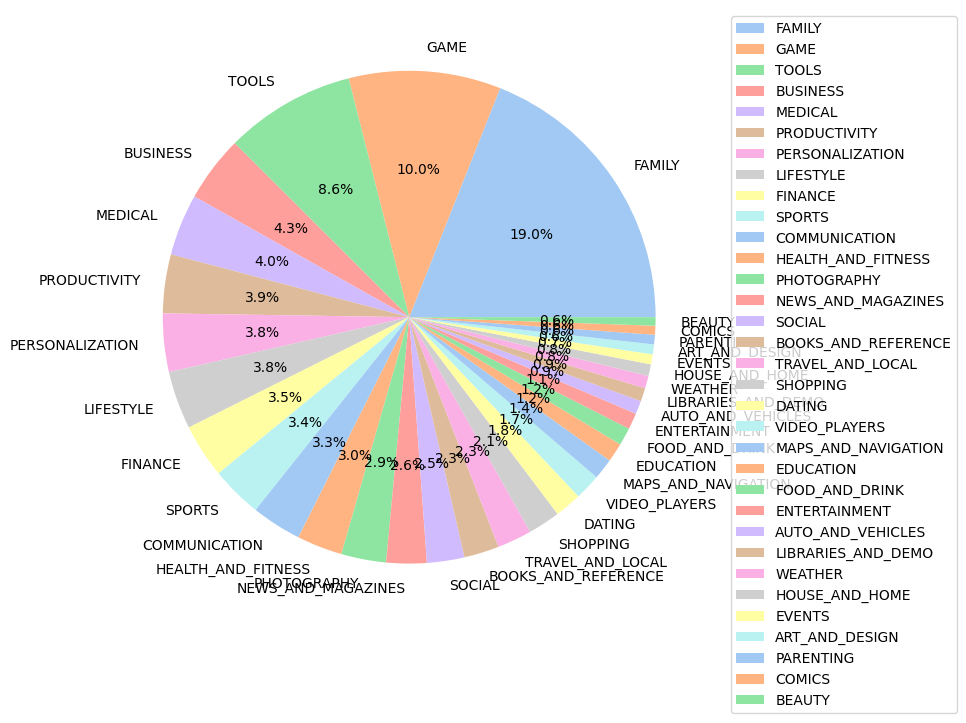

In [37]:
category = df['Category'].value_counts().reset_index()
num_colors = len(category)
palette = sns.color_palette("pastel", n_colors=num_colors)
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.pie(x = category['Category'], labels= category['index'],autopct= '%1.1f%%',colors=palette)
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show() 

In [38]:
## Top 5 categories by counts
top5_categories=df['Category'].value_counts(ascending=False).head().reset_index()
top5_categories   

,index,Category
0,FAMILY,1816
1,GAME,954
2,TOOLS,820
3,BUSINESS,414
4,MEDICAL,387


## Top 10 installed Apps under each category

In [39]:
def plot_top_10_installed_apps(category):
    def top_10_installed_apps(category):
        return df.groupby(['Category','App'])['Installs'].sum().loc[category].sort_values(ascending=False)[:10]

    colors = sns.color_palette('pastel')
    top_10_apps = top_10_installed_apps(category)
    top_10_apps.plot(kind='bar', xlabel='Apps', ylabel='No of Installations', title='Top 10 Apps', color=colors)

### Top 10 apps under Family

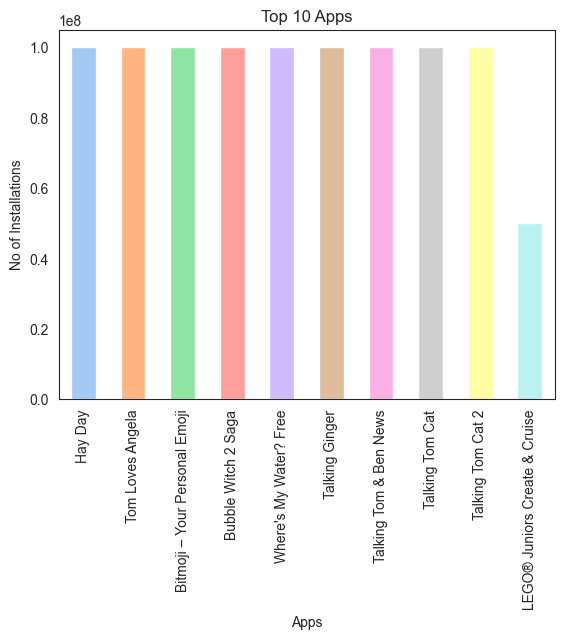

In [110]:
plot_top_10_installed_apps('FAMILY')

### Top 10 apps under Tools

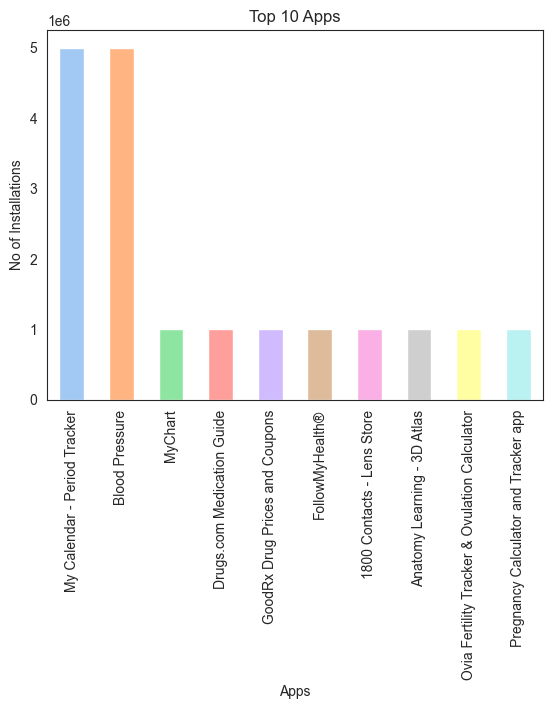

In [112]:
plot_top_10_installed_apps('MEDICAL')

## Free Vs Paid Apps percentage

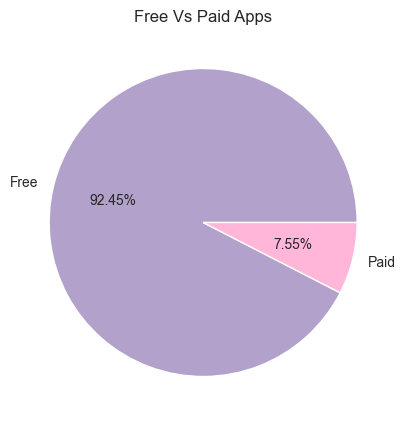

In [113]:
paid_or_free=df['Type'].value_counts()
labels=df['Type'].value_counts().index
plt.figure(figsize=(8,5))
colors= ['#B1A1CB', '#FFB6D9']
explode=(0.01,0.1)
plt.pie(paid_or_free,labels=labels,colors=colors,autopct='%.2f%%',textprops={'fontsize': 10})
plt.title('Free Vs Paid Apps')
plt.show()

In [114]:
df['Type'].value_counts()

Free    8845
Paid     722
Name: Type, dtype: int64

## Content rating of apps

In [125]:
df.groupby(['Content Rating'])['App'].count()

Content Rating
Adults only 18+       3
Everyone           7820
Everyone 10+        321
Mature 17+          390
Teen               1031
Unrated               2
Name: App, dtype: int64

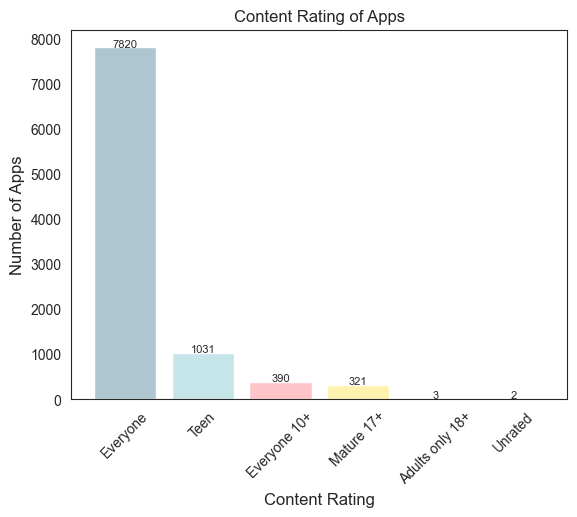

In [127]:
import matplotlib.pyplot as plt

data = df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']
colors=['#AEC6CF', '#C5E5E9', '#FFC4C7', '#FFF2AE', '#D1D1E0', '#FDDAEC', '#C7E9C0', '#FEC8D8', '#E6F5C9', '#FFE5CC']
plt.bar(labels, data,color=colors)
plt.title('Content Rating of Apps',fontsize=12)
plt.xlabel('Content Rating',fontsize=12)
plt.xticks(range(len(data)), labels, rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Apps',fontsize=12)
for i, count in enumerate(data):
    plt.text(i, count+10, str(count), ha='center', fontsize=8)

plt.show()

## Rating Distribution

In [129]:
df.groupby(['Rating'])['App'].count()

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      11
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      81
3.1      69
3.2      62
3.3     100
3.4     126
3.5     156
3.6     167
3.7     224
3.8     286
3.9     359
4.0     512
4.1     620
4.2     809
4.3    2277
4.4     894
4.5     847
4.6     683
4.7     442
4.8     221
4.9      85
5.0     268
Name: App, dtype: int64

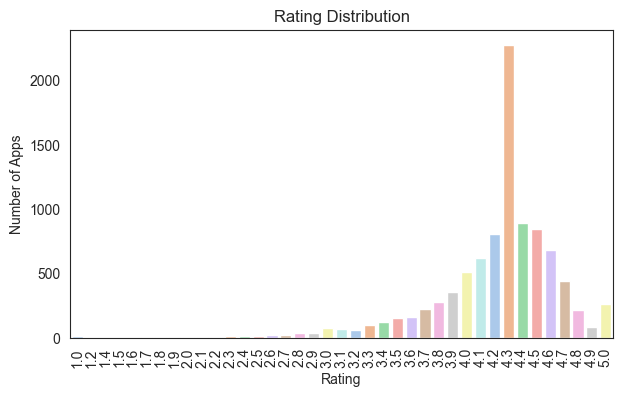

In [130]:
plt.figure(figsize=(7,4))
sns.countplot(x='Rating',data=df,palette='pastel')
plt.title('Rating Distribution')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.show()

## Top 10 Categories with highest installation

In [136]:
df.groupby(['Category'])['Installs'].sum()[:15].sort_values(ascending=False)

Category
GAME                   13878924410
COMMUNICATION          11038276250
FAMILY                  4427881395
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665968575
BUSINESS                 697164860
FINANCE                  455348730
EDUCATION                352952000
FOOD_AND_DRINK           211798750
DATING                   140926105
ART_AND_DESIGN           114333100
AUTO_AND_VEHICLES         53130210
COMICS                    44981150
BEAUTY                    27197050
EVENTS                    15973160
Name: Installs, dtype: int64

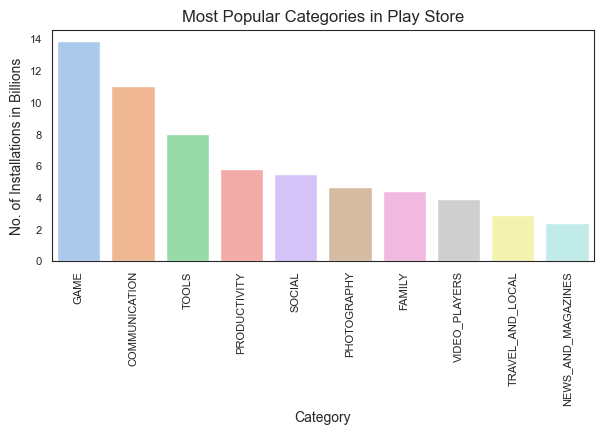

In [141]:
top_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
top_installs.Installs = top_installs.Installs/1000000000# converting into billions
top_installs_10 = top_installs.head(10)
plt.figure(figsize = (7,3))
sns.despine()
ax = sns.barplot(x = 'Category' , y = 'Installs' , data = top_installs_10,palette='pastel' )
ax.set_xlabel('Category',fontsize=10)
ax.set_ylabel('No. of Installations in Billions',fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=8)
ax.set_title("Most Popular Categories in Play Store", size = 12)
sns.set_style("white")

### Correlation heatmap

C:\Users\adeeb\AppData\Local\Temp\ipykernel_13132\363615674.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')


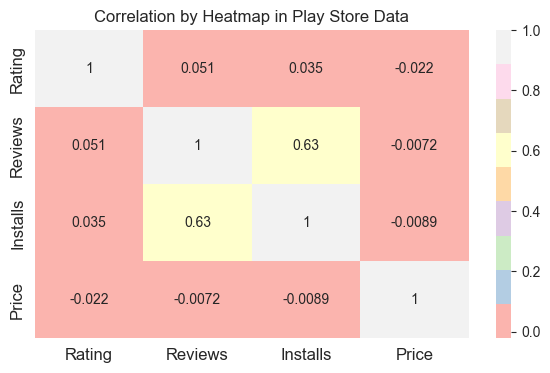

In [142]:
#plot a heatmap to see the correlaton between the columns
plt.figure(figsize=(7,4))
ax=sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')
plt.title("Correlation by Heatmap in Play Store Data",fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()